## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat  # SciPy module to load .mat files

## Loading MNIST dataset

In [3]:
mnist = loadmat('mnist-dataset/mnist-original.mat')

In [4]:
# A sample of size 70.000 of 28x28 = 784pixels grayscale images
mnist['data'].shape

(784, 70000)

In [5]:
# Labels corresponding to each image
mnist['label'].shape

(1, 70000)

In [6]:
# Combining data and label in one dataframe
nb_pixels = mnist['data'].shape[0]
nb_images = mnist['data'].shape[1]

mnist_dataset = pd.DataFrame(mnist['data'].T)
mnist_dataset.columns = ['x_{index}'.format(index=i) for i in range(nb_pixels)]
mnist_dataset['label'] = mnist['label'].T

In [7]:
mnist_dataset.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_775,x_776,x_777,x_778,x_779,x_780,x_781,x_782,x_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### Selecting a sample of size = 5000 to work on

In [15]:
sample_size = 5000
mnist_dataset_sample = mnist_dataset.sample(n=sample_size, random_state=123)

In [16]:
data = mnist_dataset_sample.drop('label', 1)
label = mnist_dataset_sample['label']

## Data visualization

In [66]:
def plot_data(data, label, title='Label', size=12):
    plt.rcParams['figure.constrained_layout.use'] = True
    dataset_size = data.shape[0]
    label = pd.Series(label)
    # Converting and reshaping each row of the dataset as a 28x28 image to have a plottable array
    images = [
        data.iloc[i, :].values.reshape(28, 28) for i in range(dataset_size)
    ]

    # Selecting a random sample of size=12(by default) from the dataset
    select = np.random.randint(dataset_size, size=size)
    rows = np.floor(np.sqrt(size))
    cols = np.ceil(size / rows)
    
    # Plotting each image with its corresponding label
    for index, value in enumerate(select):
        plt.subplot(rows, cols, index + 1)
        plt.axis('off')
        plt.imshow(
            images[value],
            cmap=plt.cm.gray_r,
            interpolation="nearest")
        plt.title('{}: {}'.format(title, int(label.iloc[value])))

    plt.show()

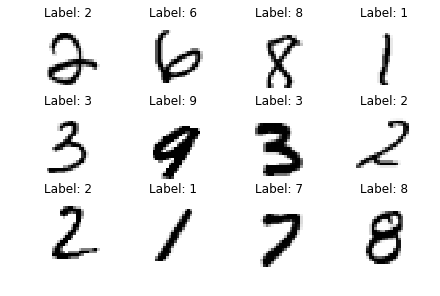

In [67]:
plot_data(data, label)

## Train/Test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

## Fitting the k-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier as knn

### The optimal value of k
#### We're going to fit the k-NN with multiple values of k and each time compute the accuracy. The optimal k corresponds to the maximum accuracy

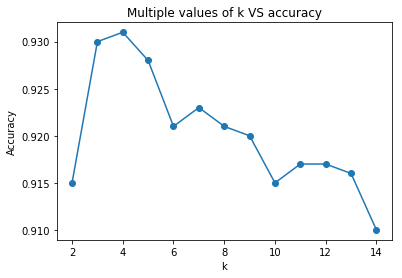

In [21]:
k_values = np.arange(2, 15, 1)
accuracies = []

for k in k_values:
    clf = knn(n_neighbors=k)
    fit = clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, 'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Multiple values of k VS accuracy')
plt.show()
    

### More with the 4-NN

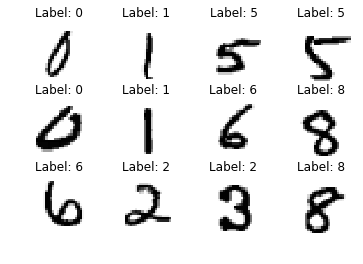

In [22]:
clf = knn(n_neighbors=4)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
plot_data(X_test, predictions)

### Misclassified images

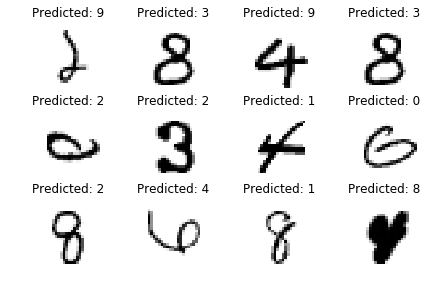

In [69]:
test_sample_size = len(y_test)

misclass_images_indices = [
    index for index in range(test_sample_size)
    if not y_test.iloc[index] == predictions[index]
]
misclass_images = X_test.iloc[misclass_images_indices]
predicted_labels = predictions[misclass_images_indices]

plot_data(misclass_images, predicted_labels, 'Predicted')